In [1]:
%load_ext autoreload
%autoreload 2

import sklearn
import scipy
from scipy.stats import multivariate_normal
import numpy as np
import matplotlib.pyplot as plt

# Optimal Design of Experiment for Adaptive Sampling
## A look at online information gathering

For this PSet we'll be walking you through the core of adaptive sampling theory -- namely we'll be having you react to observations made in an unknown environment in order to best address a goal of your robot. 

## Preliminaries: Modeling as a GP and Information Theory

First, we'll be asking you to review a little bit about Gaussian Processes (GPs) in order to understand how we'll be asking you to model your probabilistic belief in the world as you navigate and take samples. We will also present a primer on information-theoretic measures to set you up for starting to formulate the relevant functions necessary to motivate the adaptive sampling problem.

Let's start with your world representation. In many adaptive sampling tasks, the robot has little to no information about the environment of interest. As samples are collected, the robot should be able to start modeling the environment probabilistically in order to inform the next trajectories. As we learned in a previous lecture, GPs are a particualrly compelling technique for modeling distributions of a variable of interest when we are not interested or are not able to define specific parameters. We're asking you to keep a map of your belief through a GP representation for this exercise. 

We have provided a helpful library for creating, updating, and plotting your GP belief map. Let's get familiar with it.

Text(0,0.5,'PDF - Need to renormalize')

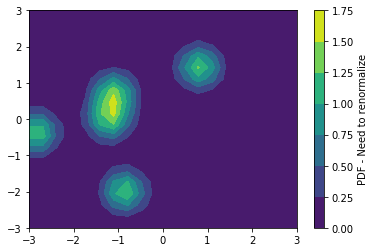

In [78]:
###### TODO
#. We can obtain uncertainty (sigma, covariance) 
# easily just by adding return_std, return_cov options when calling model.predict(X).

# create gridded space
N = 20
xlim = [-3, 3]
ylim = [-3, 3]
X = np.linspace(xlim[0],xlim[1],N)
Y = np.linspace(ylim[0],ylim[1],N)
X, Y = np.meshgrid(X, Y)
# Pack X and Y into a single 3-dimensional array
pos = np.zeros(X.shape + (2,))
pos[:,:,0] = X
pos[:,:,1] = Y


num_features = 5

Z = np.zeros(X.shape)
for k in range(num_features):
    mean_x = np.random.uniform(xlim[0],xlim[1])
    mean_y = np.random.uniform(ylim[0],ylim[1])
    # Mean vector and covariance matrix
    mu = np.array([mean_x, mean_y])
    sigma = np.array([[ 0.1 , 0], [0,  0.15]])
    F = multivariate_normal(mu,sigma)
    
    # add probabilities together to create final map
    Z += F.pdf(pos)


fig = plt.figure()
testPlot = plt.contourf(X, Y, Z)
cbar = plt.colorbar(testPlot )
cbar.ax.set_ylabel('PDF - Need to renormalize')


Now it is your turn. Please complete the function which takes as input a GP instance and a sample of data, and returns an updated GP instance.

In [2]:
def update_belief(GP, sample):
    """
    input: 
    GP -- a GP object
    sample -- data with information that can be used to update the GP object
    
    output: updated GP object
    """
    # TODO your code here!
    raise NotImplementedError('Solution not yet implemented')
    return 

Let's check that it works with a simple fitting problem:

In [4]:
###### TODO
#instantiate a GP instance
#have a list of data
#iterate through the list of data and use the update_belief function
#check that it matches the expectation

Now that you're ready to start collecting belief, let's introduce you to a few ways of defining "information"....[INSERT DISCUSSION ABOUT INFORMATION HERE].

[HAVE STUDENTS IMPLEMENT A FEW MEASURES OF "INFORMATION" ON A SET OF DATA AND COMPARE THOSE MEASURES].

In [5]:
###### TODO
#walk through of implementing information measures (provide a set of data to look at)
#help them visualize/compare these measures 

Great! You're now ready to start formulating the goal for your vehicle and compelling it to start adaptive sampling.

## Expressing Reward and Cost

Central to the adaptive sampling problem is expressing an objective (generally maximizing information gain or minimizing uncertainty) and formulating an appropriate reward and cost function for the vehicle. These functions are ultimately applied to all possible actions in order to choose the "best" action at that time.

For this PSet, we would like you to work with this objective:

$$ arg \max\limits_{r \in S} I(r) \quad \textrm{s.t.} \quad C(r) \leq B $$

That is, from all possible actions, choose the action which maximizes information along that action; subject to a budgetary constraint applied to the cost of the action.

### What's Rewarding in Adaptive Sampling?

Depending on the specific application of this adaptive sampling platform, there may be several different ways of formulating this reward. Let's look at three of them:

**Exploitative -- High Values** -- Sometimes all we care about is collecting samples that are "interesting" because they have a high cost. One might think about the case of sampling in the ocean, and only focusing on areas with dissolved CO2 or methane higher than some baseline threshold). This is known as an exploitative reward. Write a function which takes in a series of sample measurements and selects the most exploitative sample.

In [6]:
def get_exploitative_reward(samples):
    """
    input:
    samples -- a list of samples (include location and mean/variance of the sample)
    
    output:
    return the location of the most exploitative sample
    """
    #TODO your code here!
    raise NotImplementedError("Not yet implemented")
    return

In [7]:
##### TODO 
#test their function

**Explorative -- Coverage is Key** -- Now we consider the case in which we only care about collecting samples which we have low certainty on. Imagine a scenario in which all we want is a good survey of a large area -- this reward should help to optimize a path which "sees" a lot of this area.

In [8]:
def get_explorative_reward(samples):
    """
    input:
    samples -- a list of samples (includes location and mean/variance of the sample)
    
    output:
    returns the location of the most explorative sample
    """
    #TODO your code here!
    raise NotImplementedError("Not yet implemented")
    return

In [9]:
###### TODO
#test their function

**Trading off** -- Sometimes we actually care about both exploring in high value areas and seeing a lot of the world. This is the "explore-exploit" tradeoff, and this is well discussed in the literature. Often the elements of explore are weighted by some parameter $\beta$. Please write a function that takes in a set of samples and some $\beta$ and returns the best trade-off value.

In [10]:
def get_explore_exploit_reward(samples, beta):
    """
    input:
    samples -- a list of samples (includes location and mean/variance of the sample)
    beta -- a parameter which weights the importance of exploring
    
    output:
    returns the location of the best trade-off sample
    """
    #TODO your code here!
    raise NotImplementedError("Not yet implemented")
    return

In [11]:
###### TODO
#test their function

### How costly is sampling?

Finally, we want to also be able to quantify how costly taking a certain sample is. For the purposes of this PSet, let's define cost as "cost to go" -- that is, the euclidean distance between the pose of the vehicle and the location of the sample. Please complete the cost function below with this in mind.

In [12]:
def cost(pose, sample):
    """
    input:
    pose -- location of the vehicle
    sample -- a sample that needs to be assessed; includes location information
    
    output:
    returns the cost-to-go
    """
    #TODO your code here!
    raise NotImplementedError("Not yet implemented")
    return

In [13]:
##### TODO
#test their function

## Getting Around: Navigating based on Sample Utility

Now that we have formulated our reward and cost functions, let's think about how we'll apply them to getting around a world. We've endowed your robot with the ability to go forward, back, right, and left. These are "action primitives" in this world, and you can think of these as $S$ in your objective formulation. In order to select the best action at each time step, you will need to apply your reward and cost functions to each of these actions to assess two things: that the action has the best reward, and that the action is "within budget." 

Complete the function below that will take in your current location, your action primitives, and your GP in order to pick the best primitive.

In [14]:
def pick_primitive(pose, belief, budget, primitive_set, reward_function='exploit'):
    """
    input:
    pose -- robot's current position in the world
    belief -- GP instance
    budget -- the budget that is left for sampling
    primitive_set -- the actions which can be taken (represented as step-sizes in the world)
    reward_function -- keyword for which reward function to be used
    """
    # TODO your code here!
    raise NotImplementedError("Not yet implemented")
    return

In [15]:
##### TODO
#test their function

## Putting it All Together: Exploring Europa

You've just joined the engineering team responsible for determining how one of the rovers on the next trip to Europa should be collecting samples. This is a complicated task -- we don't have a great sense of the type of environment that the rover will be landing in, though we know that we are generally interested in the density of carbon in ice samples taken from the surface. As sampling is the only way we can learn about this icy sphere, it is critical that the samples collected are somewhat representative of the area that the rover has landed in. As the rover has a number of other missions it needs to conduct, your team has been given a budget of how much the vehicle can travel before the next mission starts. 

Finish your work so far by allowing the utility assessment to operate over multiple timesteps until the budget is depleted. Return the total reward you've collected, the series of actions you've taken, and the final belief map.

In [17]:
def explore_europa(budget, primitive_set, reward_type="exploit", beta=0):
    """
    input:
    budget -- the total travel budget allowed for your mission
    primitive_set -- the known ways the robot can move at each time step
    reward_type -- determine which reward function to use
    beta -- relevant to if the exploit-explore reward is used
    
    output:
    total_reward -- how much reward was accumulated during the search
    actions_taken -- list of all of the decisions
    final_map -- final GP instance
    """
    # TODO your code here!
    raise NotImplementedError("Not yet implemented")
    return

In [18]:
###### TODO
# create several test scenarios for their code....maybe have them do this part and then discuss what changes
# when parameters are changed?

## Limitations and Open Areas -- How Much is Enough?

What did you notice when you adjusted the reward function you used? Or beta? What are the limitations of using a pre-specified budget value?

*Your Answer Here, Please*

## Conclusions

You've now successfully implemented the core pipeline for adaptive sampling. There is a LOT of literature out there which explores this problem in a number of other contexts: active SLAM, active learning, sensor selection, informative path planning, the multi-armed bandit problem, etc. In nearly any online type setting in robotics, being able to adapt to one's environment is critical to success of the platform.